<a href="https://colab.research.google.com/github/angelmorenocalvo/taller_TensorFlow/blob/master/MNIST_DENSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [0]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [0]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [0]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [0]:
train_labels.shape

(60000, 10)

In [0]:
history = network.fit(train_images, train_labels, epochs=5, batch_size=128, validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.2551 - acc: 0.9271 - val_loss: 0.1268 - val_acc: 0.9611
Epoch 2/5
60000/60000 [==============================] - 3s 54us/step - loss: 0.1030 - acc: 0.9693 - val_loss: 0.0804 - val_acc: 0.9760
Epoch 3/5
60000/60000 [==============================] - 3s 56us/step - loss: 0.0679 - acc: 0.9794 - val_loss: 0.0727 - val_acc: 0.9780
Epoch 4/5
60000/60000 [==============================] - 3s 56us/step - loss: 0.0485 - acc: 0.9854 - val_loss: 0.0748 - val_acc: 0.9767
Epoch 5/5
60000/60000 [==============================] - 3s 56us/step - loss: 0.0365 - acc: 0.9889 - val_loss: 0.0675 - val_acc: 0.9794


In [0]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 56us/step
test_acc: 0.9769


In [0]:
import matplotlib.pyplot as plt

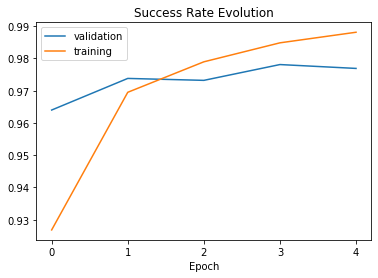

In [0]:
plt.plot(history.epoch, history.history['val_acc'], label='validation')
plt.plot(history.epoch, history.history['acc'], label='training')
plt.legend()
plt.title('Success Rate Evolution')
plt.xlabel('Epoch')
plt.xticks(history.epoch)
plt.show()
                                        